# Defining a custom model of 2 dense layers

In [1]:
import tensorflow as tf

class Model(tf.keras.Model):
  def __init__(self, units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=units,
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(1)

  def call(self, x, training=True):
    # For Keras layers/models, implement `call` instead of `__call__`.
    x = x[:, tf.newaxis]
    x = self.dense1(x)
    x = self.dense2(x)
    return tf.squeeze(x, axis=1)

In [2]:
my_model =Model(128)

# **Untrained Prediction**

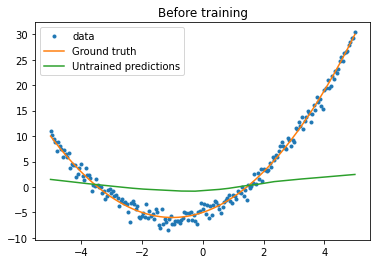

In [3]:
from matplotlib import pyplot as plt

x = tf.linspace(-5, 5, 201)

# tf.cast is to typasting of a tensor from one data format to other..
x = tf.cast(x, tf.float32)

def func(x):
    y = x**2 + 2*x - 5
    return y


# T is a random tensor of 201 elements
# shape = no. of elements
T = tf.random.normal(shape=[201])

y = func(x) + T 


plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, func(x),  label='Ground truth')
plt.plot(x, my_model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

# **Basic Training Loops**

In [4]:
variables = my_model.variables
# print(variables)

opt = tf.optimizers.Adam(learning_rate = 0.001)

for step in range(500):
    with tf.GradientTape() as tape:
        pred = my_model(x)
        error = (y-pred)**2
        mean_error = tf.reduce_mean(error)
    gradient = tape.gradient(mean_error, variables)
    opt.apply_gradients(zip(gradient, variables))

    if step % 100 == 0:
        print(f'Mean squared error: {mean_error.numpy():0.3f}')
    
    # print(pred)


Mean squared error: 82.739
Mean squared error: 12.191
Mean squared error: 3.976
Mean squared error: 2.671
Mean squared error: 2.317


# **Plotting after training**

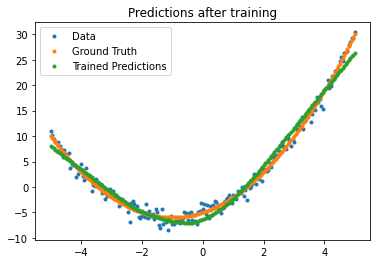

In [7]:
plt.plot(x.numpy(), y.numpy(), '.', label="Data")
plt.plot(x.numpy(), func(x), '.', label="Ground Truth")
plt.plot(x.numpy(), my_model(x), '.', label="Trained Predictions")
plt.title("Predictions after training")
plt.legend();

# **Training using model.fit**

In [9]:
new_model = Model(64)

new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
)

history = new_model.fit(
    x,
    y,
    epochs = 100,
    batch_size = 32,
    verbose=1
)

Epoch 1/100
7/7 [==============================] - 1s 1ms/step - loss: 73.1298
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 39.7388
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 30.8426
Epoch 4/100
7/7 [==============================] - 0s 1ms/step - loss: 24.4198
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 18.2278
Epoch 6/100
7/7 [==============================] - 0s 1ms/step - loss: 14.2326
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 10.4328
Epoch 8/100
7/7 [==============================] - 0s 1ms/step - loss: 7.4307
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 5.7134
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 4.2538
Epoch 11/100
7/7 [==============================] - 0s 1ms/step - loss: 3.6570
Epoch 12/100
7/7 [==============================] - 0s 2ms/step - loss: 3.2781
Epoch 13/100
7/7 [==============================] - 0s

# **Saving Model**

In [10]:
name = "new_model"
new_model.save("./Saved Models/" + name)

INFO:tensorflow:Assets written to: ./Saved Models/new_model\assets


# **Plotting losses and accuracy**

Text(0.5, 1.0, 'Model training progress')

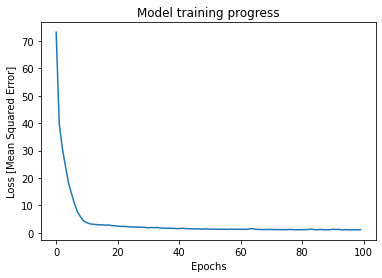

In [11]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss [Mean Squared Error]")
plt.title("Model training progress")